
# Analyse d'un fichier csv sur les films netflix 
### essentiellement avec la librairie pandas mais avec l'aide ipython.display , missingno et matplotlib 

# Sommaire 

-1 : Structure du dataframe

-2 : Analyse poussée

-3 : Graphique (matplotlib)


In [7]:
#importer pandas pour l'utilisation des données contenu dans un .csv
import pandas
#importer IPython.display pour pouvoir montrer les 5 premières et dernières lignes du dataframe 
from IPython.display import display
#importer missingo pour afficher un graphique des données manquantes dans le dataframe
import missingno as msno
#importer matplotlib pour les graphiques
import matplotlib.pyplot as plt

netflix_data= pandas.read_csv(r"C:\Users\ilyes\OneDrive\Desktop\travail\ia\netflix_titles.csv")



## 1- Structure du dataframe

In [ ]:
#Affichage des 5 premieres et dernieres oeuvres 
display(netflix_data.head())
display(netflix_data.tail())

In [6]:
#avoir les infos du dataframe ( type d'index et les colonnes, les valeurs non nulles et l'utilisation de la mémoire.)
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
#avoir les dimensions du dataframe
dimension = netflix_data.shape
print("Dimensionnalité du DataFrame :", dimension)
print(" ")

#afficher les colonnes du dataframe
colonnes = netflix_data.columns
print("Colonnes du DataFrame :", colonnes)
print(" ")

# Afficher les types de données des différentes colonnes du DataFrame
types_de_donnees = netflix_data.dtypes
print("Types de données des différentes colonnes du DataFrame :\n", types_de_donnees)

Dimensionnalité du DataFrame : (8807, 12)
 
Colonnes du DataFrame : Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
 
Types de données des différentes colonnes du DataFrame :
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


#### Il y a 12 viariable pour 8807 observation 

 données quantitatives : show_id , date_added , realease_year , duration .
données qualitatives : type , title , director , cast , country , rating , listed_in , description .


Il y a 4.075356723818175% de données manquantes dans le DataFrame.
interface graphique illustrant les données manquantes : 


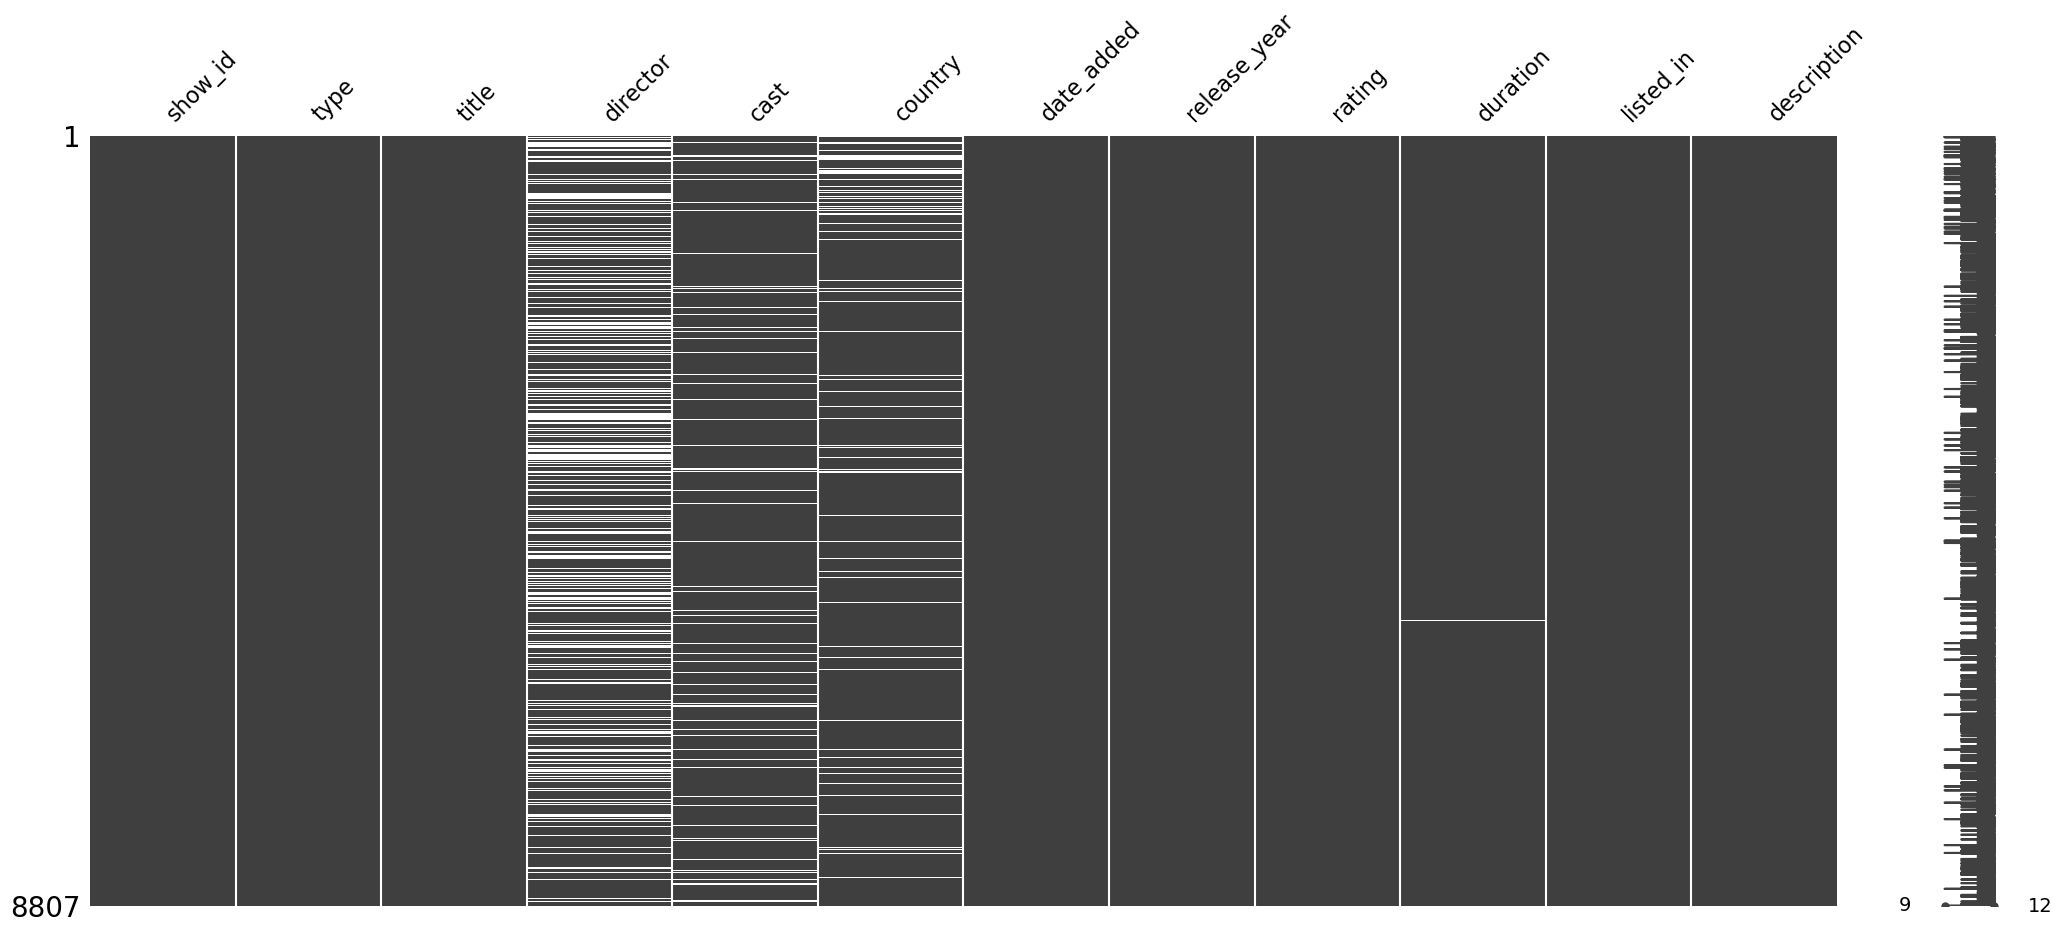

In [27]:
# Vérifier s'il y a des données manquantes dans le DataFrame
donnees_manquantes = netflix_data.isnull().any().any()

if donnees_manquantes:
    # Calculer la proportion en pourcentage de données manquantes dans le DataFrame
    proportion_donnees_manquantes = (netflix_data.isnull().sum().sum() / netflix_data.size) * 100
    print(f"Il y a {proportion_donnees_manquantes}% de données manquantes dans le DataFrame.")
    print("interface graphique illustrant les données manquantes : ")
    msno.matrix(netflix_data)
else:
    print("Il n'y a pas de données manquantes dans le DataFrame.")



2 - Analyse poussée

In [12]:
# Afficher une observation aléatoire
print(netflix_data.sample())


     show_id   type                      title         director  \
7877   s7878  Movie  Robin Hood: The Rebellion  Nicholas Winter   

                                                   cast         country  \
7877  Ben Freeman, James Oliver Wheatley, Marie Ever...  United Kingdom   

       date_added  release_year rating duration  \
7877  May 1, 2019          2018  TV-14   92 min   

                                              listed_in  \
7877  Action & Adventure, Independent Movies, Intern...   

                                            description  
7877  When the Sheriff of Nottingham takes his belov...  


In [11]:
#afficher les donnée où la colonne " title" correspaond a "Catch Me If You Can"
print(netflix_data[netflix_data["title"] == "Catch Me If You Can"])

    show_id   type                title          director  \
329    s330  Movie  Catch Me If You Can  Steven Spielberg   

                                                  cast                country  \
329  Leonardo DiCaprio, Tom Hanks, Christopher Walk...  United States, Canada   

         date_added  release_year rating duration listed_in  \
329  August 1, 2021          2002  PG-13  142 min    Dramas   

                                           description  
329  An FBI agent makes it his mission to put cunni...  


In [30]:
print(netflix_data[netflix_data['type']=='TV Show'])

     show_id     type                  title         director  \
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
5         s6  TV Show          Midnight Mass    Mike Flanagan   
...      ...      ...                    ...              ...   
8795   s8796  TV Show        Yu-Gi-Oh! Arc-V              NaN   
8796   s8797  TV Show             Yunus Emre              NaN   
8797   s8798  TV Show              Zak Storm              NaN   
8800   s8801  TV Show     Zindagi Gulzar Hai              NaN   
8803   s8804  TV Show            Zombie Dumb              NaN   

                                                   cast  \
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                         

In [31]:
#filtrer en ayant seulement les films
film= netflix_data[netflix_data["type"]=="Movie"]

# Trier la Dataframe par la colonne "release_year" dans l'ordre décroissant
film_recent = film.sort_values(by='release_year', ascending=False)

# Afficher le nom du film le plus récent
print("Le film le plus récent est :", film_recent.iloc[0]['title'])


Le film le plus récent est : Dynasty Warriors


In [10]:

#transformation du type de la colonne " date_added " en type datetime
netflix_data['date_added'] = pandas.to_datetime(netflix_data['date_added'], errors='coerce')

print(netflix_data.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-0

In [54]:
#init
netflix_data= pandas.read_csv(r"C:\Users\ilyes\OneDrive\Desktop\travail\ia\netflix_titles.csv")
#ça remplace les chaine de caractere compris entre a et z majucscule et miniscule([a-zA-Z]+) par du vide
netflix_data["duration"] = netflix_data["duration"].str.replace(r'[a-zA-Z]+'," ", regex=True)

print(netflix_data)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [84]:
#fonction pour creer une liste ou chaque chaine de caractere sera mis dans une liste
def string_to_list(string):
    return string.split(", ")

# Appliquer la fonction à chaque élément de la colonne "listed_in"
netflix_data["listed_in"] = netflix_data["listed_in"].apply(string_to_list)


print(netflix_data)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [7]:
#creation d'une liste avec les differentes variables 
variables= ["type", "country" , "release_year" , "rating" , "listed_in"]
#pour chaque variables , leurs contenus vont etre print
for variable in variables:
    #.unique sert a voir chaque contenu en une fois 
    values = netflix_data[variable].unique()
    print("----------------------------------------------------")
    print(f"variable {variable} : ")
    print(values)

----------------------------------------------------
variable type : 
['Movie' 'TV Show']
----------------------------------------------------
variable country : 
['United States' 'South Africa' nan 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'U

In [5]:
#ça prends chaque contenu de la categorie director avec le nombre de fois que c'est écrit
number_director = netflix_data["director"].value_counts()
#on selectionne tout les éléments qui sont écrit minimum une fois
multicreators = number_director[number_director >1]

print(multicreators)


director
Rajiv Chilaka                 19
Raúl Campos, Jan Suter        18
Marcus Raboy                  16
Suhas Kadav                   16
Jay Karas                     14
                              ..
Abhijit Panse                  2
Jose Manuel Colón              2
Rhys Thomas                    2
Rizal Mantovani                2
Nawapol Thamrongrattanarit     2
Name: count, Length: 867, dtype: int64


In [41]:
#init
netflix_data= pandas.read_csv(r"C:\Users\ilyes\OneDrive\Desktop\travail\ia\netflix_titles.csv")

# Supprimer les espaces en trop dans la colonne "date_added"
netflix_data["date_added"] = netflix_data["date_added"].str.strip()

# Convertir la colonne "date_added" en datetime en indiquant le format
netflix_data["date_added"] = pandas.to_datetime(netflix_data["date_added"], format='%B %d, %Y')

#selection des films
films = netflix_data[netflix_data["type"]=="Movie"]
#selection des films
films = netflix_data[netflix_data["type"]=="TV Show"]

# Extraire l'année à partir de la colonne "date_added" et la mettre dans une nouvelle colonne "film_par_an"
netflix_data["film_par_an"] = films["date_added"].dt.year
# pareil mais en mettant dans une colonne "films_par_an"
netflix_data["films_par_an"] = films["date_added"].dt.year

# Compter le nombre de films ajoutés chaque année
films_par_annee = netflix_data.groupby("film_par_an").size()

# Afficher le nombre de films ajoutés chaque année dans l'ordre croissant des années de sortie
print(films_par_annee)
print("------------------------------------------------------")


# Extraire l'année à partir de la colonne "date_added" et la mettre dans une nouvelle colonne "films_par_an"
netflix_data["films_par_an"] = films["date_added"].dt.year

# Compter le nombre de films ajoutés chaque année
films_par_annee = netflix_data.groupby("films_par_an").size()

# Afficher le nombre de films ajoutés chaque année dans l'ordre croissant des années de sortie
print(films_par_annee)


film_par_an
2008.0       1
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0       6
2014.0      19
2015.0      56
2016.0     253
2017.0     839
2018.0    1237
2019.0    1424
2020.0    1284
2021.0     993
dtype: int64
------------------------------------------------------
series_par_an
2008.0      1
2013.0      5
2014.0      5
2015.0     26
2016.0    176
2017.0    349
2018.0    412
2019.0    592
2020.0    595
2021.0    505
dtype: int64


In [41]:
#init
netflix_data= pandas.read_csv(r"C:\Users\ilyes\OneDrive\Desktop\travail\ia\netflix_titles.csv")

# Supprimer les espaces en trop dans la colonne "date_added"
netflix_data["date_added"] = netflix_data["date_added"].str.strip()

# Convertir la colonne "date_added" en datetime en indiquant le format
netflix_data["date_added"] = pandas.to_datetime(netflix_data["date_added"], format='%B %d, %Y')

#selection des films
films = netflix_data[netflix_data["type"]=="TV Show"]

# Extraire l'année à partir de la colonne "date_added" et la mettre dans une nouvelle colonne "films_par_an"
netflix_data["films_par_an"] = films["date_added"].dt.year

# Compter le nombre de films ajoutés chaque année
films_par_annee = netflix_data.groupby("films_par_an").size()

# Afficher le nombre de films ajoutés chaque année dans l'ordre croissant des années de sortie
print(films_par_annee)

series_par_an
2008.0      1
2013.0      5
2014.0      5
2015.0     26
2016.0    176
2017.0    349
2018.0    412
2019.0    592
2020.0    595
2021.0    505
dtype: int64


## 3 - Graphique (matplotlib)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


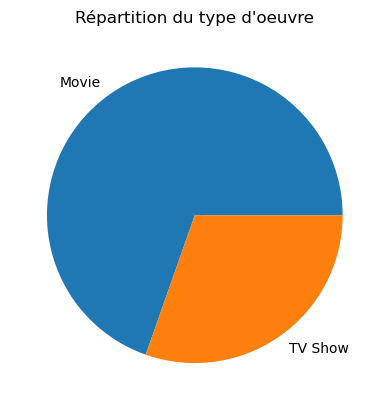

In [27]:
# Compter le nombre d'oeuvres pour chaque type
counts = netflix_data["type"].value_counts()
print(counts)

# Créer un diagramme 
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Répartition du type d\'oeuvre')
plt.show()


country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64


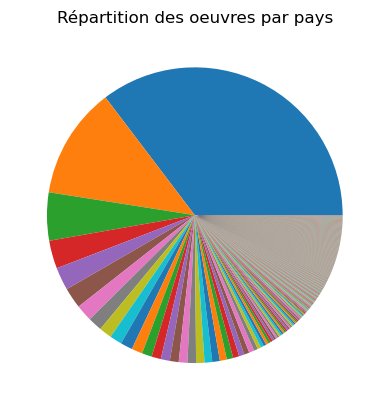

In [26]:
# Compter le nombre d'oeuvres pour chaque pays
counts = netflix_data["country"].value_counts()
print(counts)

# Créer un diagramme 
plt.pie(counts)
plt.title('Répartition des oeuvres par pays')
plt.show()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64


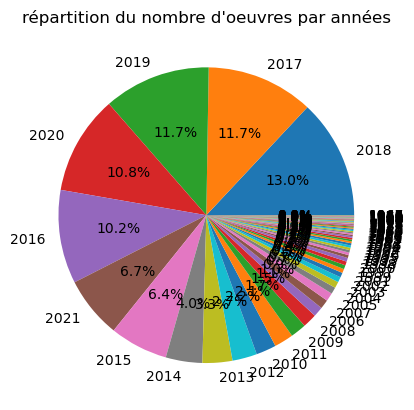

In [37]:
# Compter le nombre d'oeuvres pour chaque type
counts = netflix_data["release_year"].value_counts()
print(counts)

# Créer un diagramme 
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('répartition du nombre d\'oeuvres par années')
plt.show()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


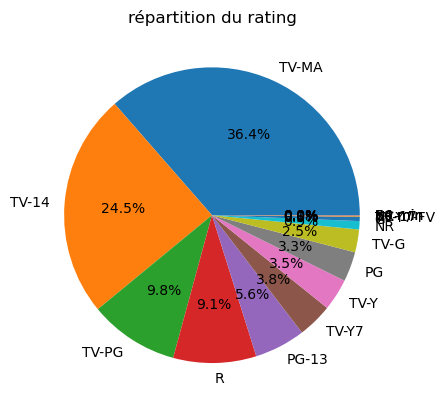

In [39]:
# Compter le nombre d'oeuvres pour chaque type
counts = netflix_data["rating"].value_counts()
print(counts)

# Créer un diagramme 
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('répartition du rating')
plt.show()

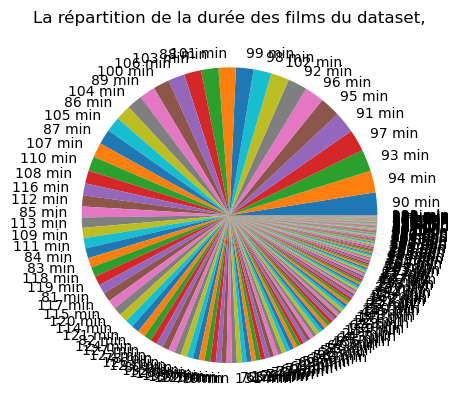

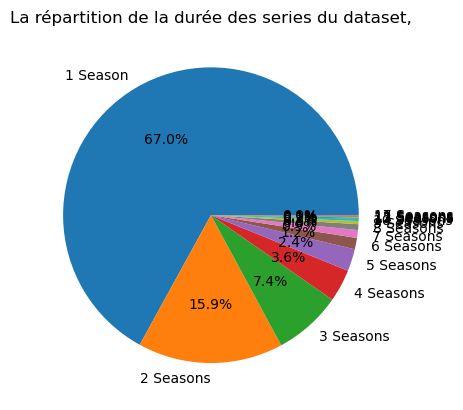

In [47]:
#selection des films
films = netflix_data[netflix_data["type"]=="Movie"]
#selection des films
films = netflix_data[netflix_data["type"]=="TV Show"]

# Compter le nombre d'oeuvres pour chaque type
counts_films = films["duration"].value_counts()
counts_films = films["duration"].value_counts()

# Créer un diagramme 
plt.pie(counts_films, labels=counts_films.index)
plt.title('La répartition de la durée des films du dataset,')
plt.show()
# Créer un diagramme 
plt.pie(counts_films, labels=counts_films.index, autopct='%1.1f%%')
plt.title('La répartition de la durée des films du dataset,')
plt.show()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64


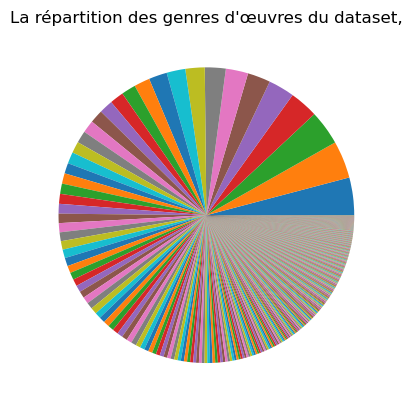

In [5]:
# Compter le nombre d'oeuvres pour chaque type
counts = netflix_data["listed_in"].value_counts()
print(counts)

# Créer un diagramme 
plt.pie(counts)
plt.title('La répartition des genres d\'œuvres du dataset,')
plt.show()

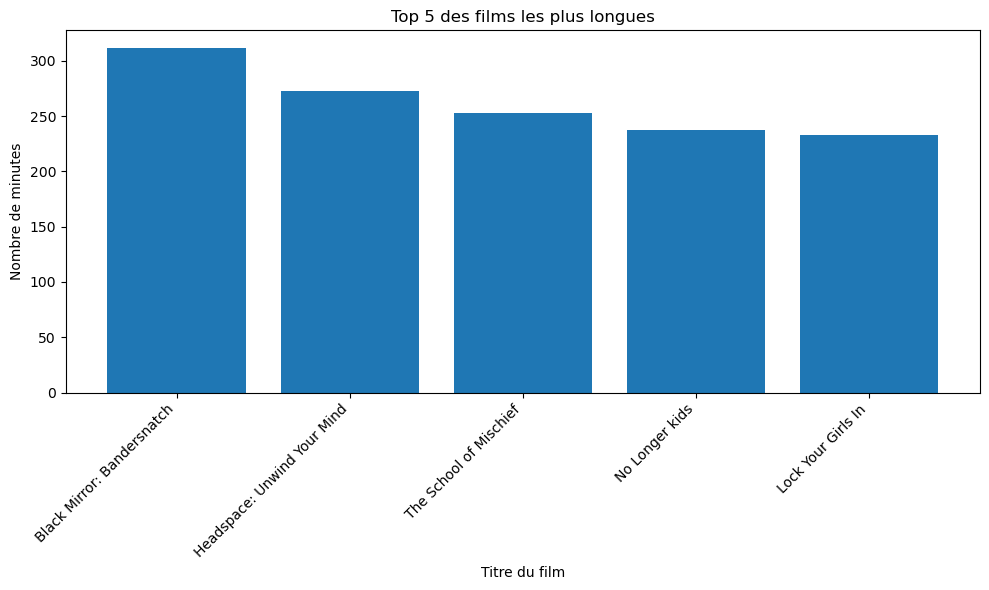

In [67]:
netflix_data= pandas.read_csv(r"C:\Users\ilyes\OneDrive\Desktop\travail\ia\netflix_titles.csv")
# Extraire les nombres de la colonne "duration"
netflix_data["duration"] = netflix_data["duration"].str.extract('(\d+)').astype(float)

# Trier les séries par durée (en ordre décroissant)
top_films = netflix_data[netflix_data["type"] == "Movie"].sort_values(by="duration", ascending=False).head(5)

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
plt.bar(top_films["title"], top_films["duration"])
plt.xlabel('Titre du film')
plt.ylabel('Nombre de minutes')
plt.title('Top 5 des films les plus longues')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x
plt.tight_layout()  # Ajustement automatique de la disposition pour éviter la superposition
plt.show()


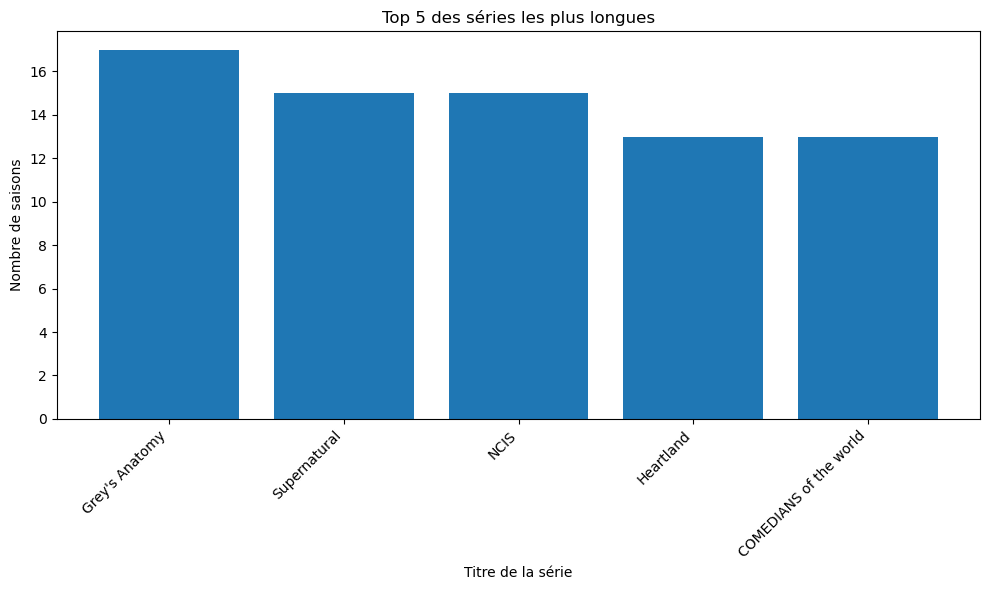

In [66]:
# Extraire les nombres de la colonne "duration"
netflix_data["duration"] = netflix_data["duration"].str.extract('(\d+)').astype(float)

# Trier les séries par durée (en ordre décroissant)
top_films = netflix_data[netflix_data["type"] == "TV Show"].sort_values(by="duration", ascending=False).head(5)

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
plt.bar(top_films["title"], top_films["duration"])
plt.xlabel('Titre de la série')
plt.ylabel('Nombre de saisons')
plt.title('Top 5 des séries les plus longues')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x
plt.tight_layout()  # Ajustement automatique de la disposition pour éviter la superposition
plt.show()


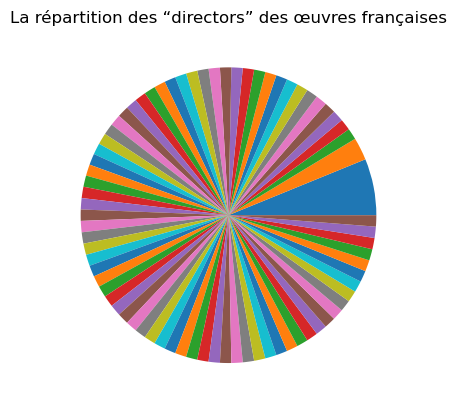

In [4]:
oeuvres_francais = netflix_data[netflix_data["country"]=="France"]

directeur_francais = oeuvres_francais["director"].value_counts()


# Créer un diagramme 
plt.pie(directeur_francais)
plt.title('La répartition des “directors” des œuvres françaises')
plt.show()

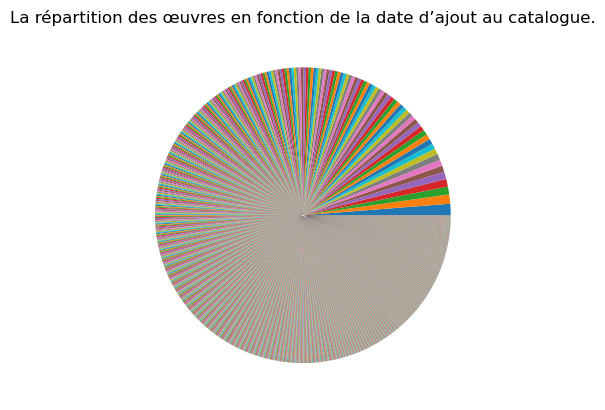

In [72]:


oeuvre_par_date = netflix_data["date_added"].value_counts()


# Créer un diagramme 
plt.pie(oeuvre_par_date)
plt.title('La répartition des œuvres en fonction de la date d’ajout au catalogue.')
plt.show()

# Conclusion : 

### Grace au notebook de jupyter , nous pouvons vraiment chercher et analyser les données d'un dataset en profondeur , on peut regarder la structure du dataset tel que le nombre d'éléments , le nombre de colonnes , les éléments manquants/vides ect... On peut faire des recherche générale tel que les 5 premiere lignes , des recherches plus poussée tel que seulement les films , seulement les oeuvres française ou alors seulement un titre spécifique . On peut aussi crée des graphique notemment avec la librairie matplotlib. 